In [96]:
import numpy as np
import pandas as pd
from itertools import product
from matplotlib import pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
import math

test_shots = 1000
qubit_num = 2
max_angle = 0.5
min_angle = 0
angle_steps = 180
x = np.arange(0, angle_steps+1, 30)
radians = [f'{deg/180:.2f}π' for deg in x]


In [97]:
def simulate(circuit, qubit_num, shots):
    meas = QuantumCircuit(qubit_num, qubit_num)
    meas.barrier(range(qubit_num))
    meas.measure(range(qubit_num), range(qubit_num))
    qc = meas.compose(circuit, range(qubit_num), front=True)
    # qc.draw('mpl')

    backend = AerSimulator()
    qc_compiled = transpile(qc, backend)
    job_sim = backend.run(qc_compiled, shots=shots)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)
    # print(counts)

    # plot_histogram(counts)
    try:
        return counts, counts['00']
    except:
        return counts, 0


In [98]:
def createCircuit(qubit_num, theta_val, phi_val, lambda_val):
    circ = QuantumCircuit(qubit_num, qubit_num)
    circ.x(0)
    circ.h(0)
    circ.cx(0, 1)
    circ.z(0)
    circ.u(theta_val, phi_val, lambda_val, 1)
    circ.cx(0, 1)
    circ.h(0)
    circ.x(0)
    return circ

In [99]:
def createSegments(min_val=min_angle, max_val=max_angle, steps=angle_steps):
    '''
    Actual values are timed with pi
    '''
    step = (max_val - min_val) / steps
    result = np.arange(min_val, max_val, step)
    return result*math.pi
    return result


In [100]:
segments = createSegments()

# $U_3$ Gate Simulation

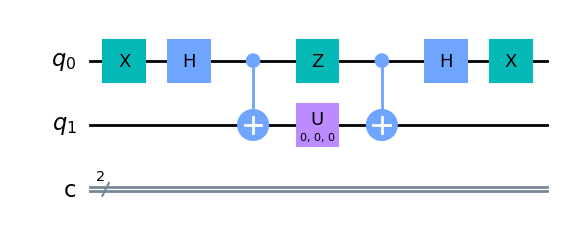

In [101]:
circ_test = createCircuit(qubit_num, 0, 0, 0)
circ_test.draw('mpl')

## Q1. 
$U_3(\underline\theta,\underline\phi,\lambda)$, changes $\lambda$

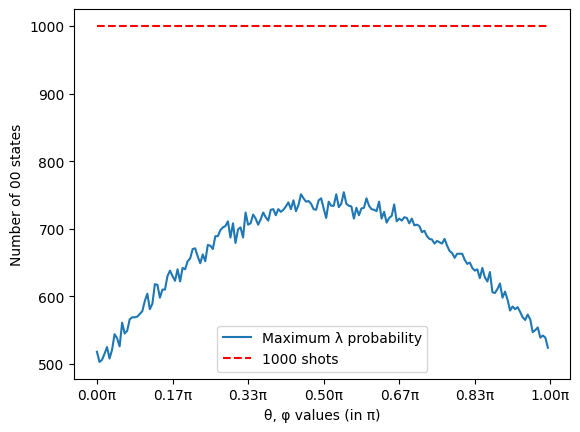

In [102]:

max_result = []
for i, ival in enumerate(segments):
    result = []
    for j, jval in enumerate(segments):
        circ = createCircuit(qubit_num, ival, ival, jval)
        _, counts00 = simulate(circ, qubit_num, test_shots)
        result.append(counts00)
        print(f'{j+1}/{len(segments)} {i+1}/{len(segments)}    ', end='\r')
    plt.plot(result, label=f'θ = {ival/np.pi:.4f}π, φ = {ival/np.pi:.4f}π, λ = [0, π]')
    plt.plot([test_shots]*len(result), 'r--')
    plt.legend()
    plt.xticks(x, radians)
    plt.xlabel('λ values (in π)')
    plt.ylabel('Number of 00 states')
    plt.savefig(f'./hw4_pic/Q1_{i+1}.png')
    plt.clf()
    max_result.append(max(result))
plt.plot(max_result)
plt.plot([test_shots]*len(max_result), 'r--')
plt.xticks(x, radians)
plt.legend(['Maximum λ probability', '1000 shots'])
plt.xlabel('θ, φ values (in π)')
plt.ylabel('Number of 00 states')
plt.savefig(f'./hw4_pic/Q1_max.png')

## Q2.
$U_3(\underline\theta,\phi,\underline\lambda)$, changes $\phi$

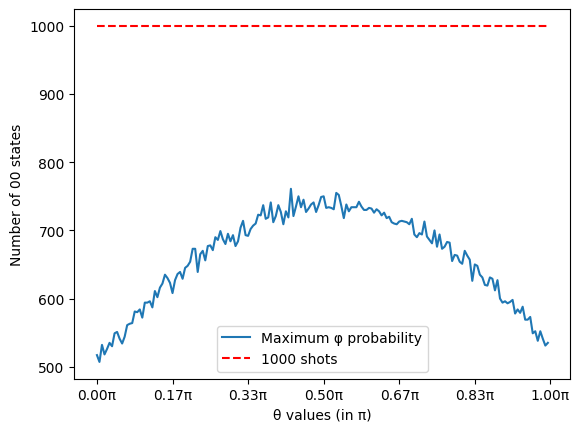

In [103]:
max_result = []
for i, ival in enumerate(segments):
    result = []
    for j, jval in enumerate(segments):
        circ = createCircuit(qubit_num, ival, jval, ival)
        _, counts00 = simulate(circ, qubit_num, test_shots)
        result.append(counts00)
        print(f'{j+1}/{len(segments)} {i+1}/{len(segments)}    ', end='\r')
    plt.plot(result, label=f'θ = {ival/np.pi:.4f}π, φ = [0, π], λ = {ival/np.pi:.4f}π')
    plt.plot([test_shots]*len(result), 'r--')
    plt.legend()
    plt.xticks(x, radians)
    plt.xlabel('φ values (in π)')
    plt.ylabel('Number of 00 states')
    plt.savefig(f'./hw4_pic/Q2_{i+1}.png')
    plt.clf()
    max_result.append(max(result))
plt.plot(max_result)
plt.plot([test_shots]*len(max_result), 'r--')
plt.xticks(x, radians)
plt.legend(['Maximum φ probability', '1000 shots'])
plt.xlabel('θ values (in π)')
plt.ylabel('Number of 00 states')
plt.savefig(f'./hw4_pic/Q2_max.png')

## Q3.
$U_3(\theta,\underline\phi,\underline\lambda)$, changes $\theta$

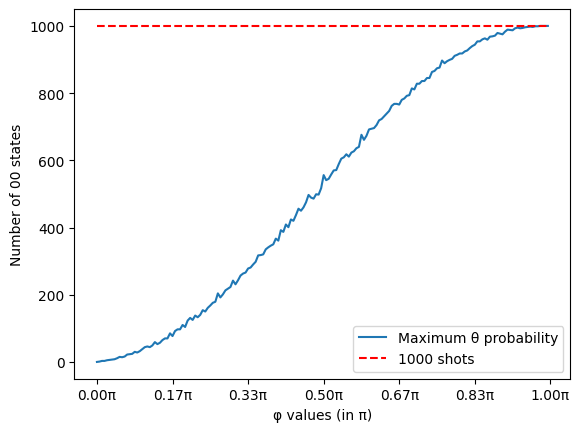

In [104]:
max_result = []
for i, ival in enumerate(segments):
    result = []
    for j, jval in enumerate(segments):
        circ = createCircuit(qubit_num, jval, ival, ival)
        _, counts00 = simulate(circ, qubit_num, test_shots)
        result.append(counts00)
        print(f'{j+1}/{len(segments)} {i+1}/{len(segments)}    ', end='\r')
    plt.plot(result, label=f'θ = [0, π], φ = {ival/np.pi:.4f}π, λ = {ival/np.pi:.4f}π')
    plt.plot([test_shots]*len(result), 'r--')
    plt.legend()
    plt.xticks(x, radians)
    plt.xlabel('θ values (in π)')
    plt.ylabel('Number of 00 states')
    plt.savefig(f'./hw4_pic/Q3_{i+1}.png')
    plt.clf()
    max_result.append(max(result))
plt.plot(max_result)
plt.plot([test_shots]*len(max_result), 'r--')
plt.xticks(x, radians)
plt.legend(['Maximum θ probability', '1000 shots'])
plt.xlabel('φ values (in π)')
plt.ylabel('Number of 00 states')
plt.savefig(f'./hw4_pic/Q3_max.png')